In [ ]:
import numpy as np
import sklearn

from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


from sklearn import metrics 
import matplotlib.pyplot as plt

cancer = load_breast_cancer()

X = cancer.data
X = np.c_[np.ones((len(X),1)),X]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)

Y = cancer.target
Y[Y == 0] = -1
Y = Y.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [ ]:
def svm_primal(X, Y, learning_rate, iterations, C):
  w = np.random.randn(len(X[0]))

  for i in range(iterations):
    for itr, val in enumerate(X):
      temp = 1 - Y[itr] * (val.dot(w))
      if temp > 0:
        gradient = (w - C * Y[itr] * val)
      else:
        gradient = w
      w = w - learning_rate * gradient / len(X[0])
  return w

In [ ]:
w = svm_primal(X_train, Y_train, 0.001, 5000, 1000)
pred = X_train.dot(w)

In [ ]:
def find_closest_to_boundary(predictions):
  positive_loc, positive_val = -1, float('inf')
  negative_loc, negative_val = -1, float('inf')

  itr = 0
  for elem in predictions:

    temp = abs(1 - elem)
    if temp < positive_val:
      positive_val = temp
      positive_loc = itr
    
    temp = abs(-1 - elem)
    if temp < negative_val:
      negative_val = temp
      negative_loc = itr
    
    itr += 1
    
  return positive_loc, negative_loc

Question 5

In [ ]:
positive_loc , negative_loc = find_closest_to_boundary(pred)

print("Training Examples Closest to Positive Boundary:\nPrediction: ", pred[positive_loc], "At position: ", positive_loc, "\nTraining Value: ", X_train[positive_loc])
print("Training Examples Closest to Negative Boundary:\nPrediction: ", pred[negative_loc], "At position: ", negative_loc, "\nTraining Value: ", X_train[negative_loc])

Training Examples Closest to Positive Boundary:
Prediction:  1.0060445640657913 At position:  81 
Training Value:  [0.         0.30711345 0.14710856 0.30080851 0.17085896 0.49173964
 0.29482854 0.13556701 0.26172962 0.36313131 0.34604044 0.01712837
 0.047096   0.01625595 0.01127759 0.09304144 0.09213807 0.03368687
 0.16652775 0.12801824 0.06537181 0.24546425 0.16791045 0.22177399
 0.11674204 0.44991085 0.21597734 0.14760383 0.45876289 0.32761679
 0.25068871]
Training Examples Closest to Negative Boundary:
Prediction:  -0.9939267130893661 At position:  203 
Training Value:  [0.         0.56883904 0.31112614 0.55013475 0.42184517 0.2666787
 0.18679836 0.21722118 0.27967197 0.44747475 0.01010952 0.20934275
 0.21698197 0.21010225 0.13901434 0.09229357 0.18819659 0.1020202
 0.25781398 0.17473406 0.06188245 0.51191747 0.36540512 0.48702625
 0.33248132 0.20425279 0.19317752 0.25615016 0.4185567  0.2515277
 0.06801784]


Question 6

In [ ]:
def print_equation(w):
  return_string = ""
  return_string += "y = " + str(w[0])
  n = len(w)
  for i in range (1, n):
    return_string += " + " + str(w[i]) + "x" + str(i - 1)

  return return_string

print(print_equation(w))

y = -1.3134804926244303e-30 + 3.1430543198410756x0 + 0.37468242829074155x1 + 2.642266858244888x2 + -0.4547098537694149x3 + 3.014572792322645x4 + -0.7755607841243728x5 + -4.045326958678338x6 + -5.197673930966309x7 + 1.797758171814406x8 + 3.5990368788314258x9 + -2.9461940469820957x10 + 0.6146643537138242x11 + -2.3706797062540015x12 + -2.3037751552194488x13 + 0.6160344932381575x14 + 1.8830425840128369x15 + 1.6185226446635899x16 + 0.8910827373410896x17 + 0.32045765149436756x18 + 0.355278792449986x19 + -0.4197031915340518x20 + -1.5393359596395721x21 + -0.2108584479699389x22 + -2.177783716842083x23 + -0.25700230645024336x24 + -0.2038366696620952x25 + -0.10738551937700445x26 + -2.136537785534986x27 + -0.8488831558765757x28 + -1.1580622614983878x29


Analysis of Training Predictions vs. Actual, for reference

Visualization of Training Success using Confusion Matrix


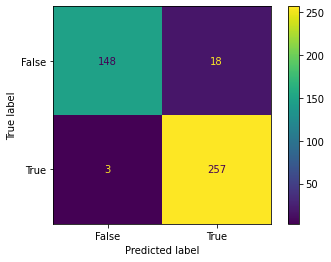

Accuracy:  0.9507042253521126  Precision:  0.9345454545454546   Recall:  0.9884615384615385


In [ ]:
pred_recalculate = [0 for _ in range(len(pred))]
itr = 0
for elem in pred:
  if elem < 0:
    pred_recalculate[itr] = -1
  else:
    pred_recalculate[itr] = 1
  
  itr += 1

print("Visualization of Training Success using Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(Y_train, pred_recalculate)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

accuracy = metrics.accuracy_score(Y_train, pred_recalculate)
precision = metrics.precision_score(Y_train, pred_recalculate)
recall = metrics.recall_score(Y_train, pred_recalculate)

print("Accuracy: ", accuracy, " Precision: ", precision, "  Recall: ", recall)

Question 7:

Random Weights already implemented (initializing w with random)
KFold variation below:

In [ ]:
def KFoldCrossValidate(k, X, Y, learning_rate, iterations, C):
  kf = KFold(n_splits = k, shuffle = True)
  train_score = 0
  test_score = 0

  w = np.zeros(len(X[0]))
  accuracy = 0

  for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    w_temp = svm_primal(X_train, Y_train, learning_rate, iterations, C)
    w = w + w_temp / k

    pred = X_train.dot(w)
    pred[pred < 0] = -1
    pred[pred > 0] = 1
    accuracy_temp = metrics.accuracy_score(Y_train, pred)

    accuracy += accuracy_temp / k
  
  return w, accuracy

In [ ]:
Kfold_w, accuracy = KFoldCrossValidate(5, X, Y, 0.001, 5000, 1000)

print("KFold - Accuracy: ", accuracy)

KFold - Accuracy:  0.9340938885675728


Doing the same thing with generated Make Blobs data:

In [ ]:
X, Y = sklearn.datasets.make_blobs(n_samples=1000, centers=2, random_state=0)

X = np.c_[np.ones((len(X),1)),X]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)
Y[Y == 0] = -1
Y = Y.reshape(-1, 1)

Visualization of Training Success using Confusion Matrix


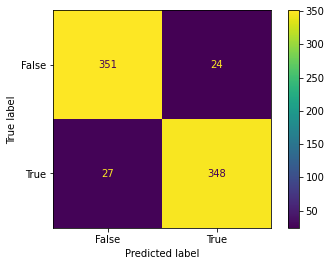

Accuracy:  0.932  Precision:  0.9354838709677419   Recall:  0.928


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
w = svm_primal(X_train, Y_train, 0.001, 5000, 1000)
pred = X_train.dot(w)

pred_recalculate = [0 for _ in range(len(pred))]
itr = 0
for elem in pred:
  if elem < 0:
    pred_recalculate[itr] = -1
  else:
    pred_recalculate[itr] = 1
  
  itr += 1

print("Visualization of Training Success using Confusion Matrix")

confusion_matrix = metrics.confusion_matrix(Y_train, pred_recalculate)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

accuracy = metrics.accuracy_score(Y_train, pred_recalculate)
precision = metrics.precision_score(Y_train, pred_recalculate)
recall = metrics.recall_score(Y_train, pred_recalculate)

print("Accuracy: ", accuracy, " Precision: ", precision, "  Recall: ", recall)

Kfold_w, accuracy = KFoldCrossValidate(5, X, Y, 0.001, 5000, 1000)
print("KFold - Accuracy: ", accuracy)